## Log returns and Simple returns

Insight: If innovations in log returns are iid then, log returns at long enough horizons must be normal (Central Limit Theorem)

$$1+𝑅_{1→𝑇}=((1+𝑅_1 )(1+𝑅_2 )…(1+𝑅_𝑇))⁡\\
ln⁡(1+𝑅_{1→𝑇} )=ln⁡((1+𝑅_1 )(1+𝑅_2 )…(1+𝑅_𝑇 ))\\
ln⁡(1+𝑅_{1→𝑇} )=ln⁡(1+𝑅_1 )+ln⁡(1+𝑅_2 )+…+ln⁡(1+𝑅_𝑇 )\\
                    𝑟_{1→𝑇}=𝑟_1+𝑟_2+…+𝑟_𝑇 $$ 



* Thus, if T is large, $𝑟_{1→𝑇}$ will be approximately normally distributed. (central limit theorem)

* $𝑟_𝑡=ln⁡(1+𝑅_𝑡 )$ is the rate of return assuming continuous compounding for the period t.

* This turns out to hold up well if you look at horizons longer than a month, but does not work at all at daily frequency (much fatter left tail than the normal distribution predicts)


* Log returns are also very convenient when thinking about long-term investing

In [33]:
print([np.log(1+Data.MKT).skew(),X.skew()])

print([np.log(1+Data.MKT).kurtosis(),X.kurtosis()])

[-0.7707864524331097, -0.10212480191113225]
[2.859221702344219, -0.17043746558020745]


#### How to go back and fourth between log and simple returns?

Let R be a simple net return per period, i.e., if you invest 10 , you get 10(1+R) in the end of the period

R is a number like 5% (0.05)

We say 1+R, a number like 1.05 is a gross return. 

Why gross? Because it includes 1, your initial investment.

* To get log returns: $r=log(1+R)$


* To get back simple returns: $R=exp(r)-1$

In [34]:
r=np.log(1+Data.MKT)
R=np.exp(r)-1
pd.concat([R,Data.MKT],axis=1).head()

,MKT,MKT
Date,,
1963-02-28,-0.0215,-0.0215
1963-03-31,0.0331,0.0331
1963-04-30,0.0476,0.0476
1963-05-31,0.0200,0.0200
1963-06-30,-0.0177,-0.0177


In [35]:
threshold=3
# now real data in log returns

A=((np.log(Data.MKT+1)-np.log(Data.MKT+1).mean())<-threshold*np.log(Data.MKT+1).std())
B=((X-X.mean())<-threshold*X.std())
[A.sum(),B.sum()]

[4, 0]

### The tangency portfolio and the cross-sectional of expected returns


* The optimal condition for our tangency portfolio:

$$ Var(R^e)W^*=cte \times E[R^e]$$

* This condition above defines the tangency portfolio

* We can rewirte the left hand side as

$$Var(R^e)W^*=Cov(R^e,R^e)W^*=Cov(R^e,(W^*)'R^e)=Cov(R^e,R^*)$$

* The left-hand side in the covariance vector of all the assets with the tangency portfolio

* This means that the expected return of an asset must be proportional to the covariance between the return of the asset and the return of the tangency portfolio

$$ E[R^e]=cte \times Cov(R^e,R^*) $$


* This holds for all assets in your investment opportunity set (i.e. the assets included in the minimization problem that the tangency portfolio solves)


* This means that for any assets $j$ and $i$ we have 


$$\frac{E[R^e_i]}{Cov(R^e_i,R^*)}= \frac{E[R^e_j]}{Cov(R^e_j,R^*)} $$ 


* All assets have the same expected return per-unit of covariance with the tangency portoflio

* We can also apply this to the tangency portfolio itself


$$ E[R^*]=cte \times Cov(R^*,R^*) $$


* Which means that $cte=\frac{E[R^*]}{Var(R^*)}$


* Plugging back in the original and we get that for any asset $j$


$$ E[R^e_j]=\frac{E[R^*]}{Var(R^*)} Cov(R^e_j,R^*) =\frac{Cov(R^e_j,R^*)}{Var(R^*)}E[R^*]=\beta_{j,*}E[R^*] $$



$$ E[R^e_j]=\beta_{j,*}E[R^*] $$

> What does that remind you?

* All the information about the cross-sectional of expected returns--all the assets-- can be summarized by the expected return of the tangency portfolio and the beta of each asset with respect to the tangency portfolio

* Or Alternatively: the risk-return trade-off  of the tangency portfolio  $\frac{E[R^*]}{Var(R^*)}$ and the covariance of each asset with it.


* Once you have the right notion of risk, the reward to risk is the same across assets (no free lunch)

* What is the right notion? Covariance with the tangency portfolio

* In the sample that you estimated the moments this will be true by construction!

Now we test if $ E[R^e_j]=\frac{Cov(R^e_j,R^*)}{Var(R^*)}E[R^*] $ in our sample

In [ ]:
Wstar

In [ ]:
Rstar=Re.copy()
Rstar['*']=Re @ Wstar
Rstar.cov()

In [ ]:
cov=Wstar @ Re.cov()
cov

In [ ]:
# expected return of the tangency portfolio
mu_star=Wstar @ Re.mean()
# variance of the tangency portfolio
var_star=(Wstar @ Re.cov() @ Wstar.T)
# covariance between each asset return and the tangency portfolio
cov=Wstar @ Re.cov()

predicted= mu_star/var_star*cov

print(predicted)

print(Re.mean())

* This comes from the fact that the tangency portfolio was constructed to be the portfolio with the maximum Sharpe Ratio
* It is a result of us knowing the moments of all assets summarized by $E[R^e]$  and $Var(R^e)$
* Here we did everything IN SAMPLE. We used sample moments and evalauted it's predictions using the same sample
* The challenge is that these moments are not always well estiamted, to put it mildly (more on this soon!)
* So the in sample tangency portfolio might not be very informative about the true tangency portfolio, which is the one that we actually care about

> Why? Because it can predict returns going forward and not only in sample (which is useless)

## T-stat

* T-stat for a given hypothesis $\mu_{j}^0$

$$t_j(\mu_0)=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$


## One-sided hypothesis testing
* For example lets assume we have strong theoretical reasons to believe that these assets must not have a negative expected returns. (True for the value-weighted stock market, less true for bonds)

* So lets do a 1-sided test with 5% interval and ask what it is the largest expected return $X_j$ that we can say with 95% confidence that the asset j has expected return higher than $X_j$

$$1.64=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$

* If we are evaluating the hypothesis that $\mu_{j}=0$, we say that 

  * if $\frac{\bar{R_j}-0}{\sigma(\bar{R_j})}\geq 1.64$, we can statistically reject that $\mu_{j}=0$ with a 95% confidence (or alternatively: we can statistically reject that $\mu_{j}=0$ with a 5% probabilit value (pvalue) )
  * if $\frac{\bar{R_j}-0}{\sigma(\bar{R_j})}<1.64$, we fail to statistically reject that $\mu_{j}=0$ with a 95% confidence (or alternatively: we fail to statistically reject that $\mu_{j}=0$ with a 5% probability value (pvalue) )
  

* Equivalently we can also construct our confidence intervals for the expected mean

$$\mu_{j}^{-,95\%}=\bar{R_j}-1.64\sigma(\bar{R_j})$$

$$\mu_{j}^{+,95\%}=\bar{R_j}+1.64\sigma(\bar{R_j})$$


* We say that this interval $[\mu_{j}^{-,95\%}, \mu_{j}^{+,95\%}]$ contains the true expected value with 95% probability

In [116]:
print(ERstd)

          avg_std       avg
MKTUS    0.001735  0.005140
BondUS   0.001377  0.002523
EM       0.002344  0.006923
MKTxUS   0.001836  0.004149
BondxUS  0.000793  0.002054


Here is a look at t-stats relative to a zero null-hypothesis (which is what people often do)


> Side comment: Why am using 1.64?

Recall from Notebook 3:

In [117]:
from scipy.stats import norm
ps=norm(0,1)
ps.isf(0.02)

2.053748910631823

In [118]:
# we can look at the t-stats (against zero) for the assets
# the average return divided by the average return estimator standard deviation
ERstd=pd.concat([ERstd, Re.mean()/(Re.std()/(T**0.5))],axis=1)
ERstd=ERstd.rename(columns={0:'t_stat'})
ERstd

,avg_std,avg,t_stat
MKTUS,0.001735,0.005140,2.962459
BondUS,0.001377,0.002523,1.832010
EM,0.002344,0.006923,2.953007
MKTxUS,0.001836,0.004149,2.259454
BondxUS,0.000793,0.002054,2.591087


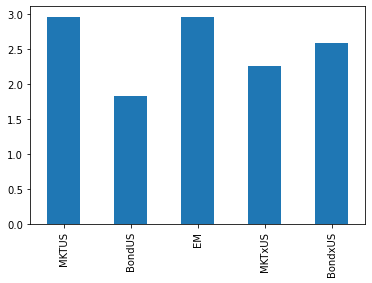

In [119]:
# Plot t-stats for each asset
ERstd.t_stat.plot.bar()
plt.show()

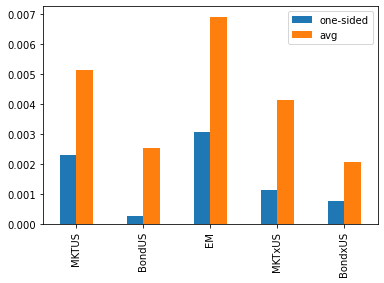

In [120]:
# Plot the left hand side of the confidence interval and the average return 
#   for each asset
ER0=pd.concat([Re.mean()-1.64*(Re.std()/(T**0.5)),Re.mean()],axis=1)
ER0=ER0.rename(columns={0:'one-sided',1:'avg'})
ER0.plot.bar()
plt.show()

## Two-sided intervals

* If we are more agnostic and believe less in the economic theories we have,

* Or the theories are silent

* For example, the theories are silent in long-short portfolios of equities, for example, the portfolio that goes long the US market and sells the international market.

* Then we must do a two-sided interval

> What is the 95% threshold for a two sided test?

In [121]:
ps.isf(0.05/2)

1.9599639845400545

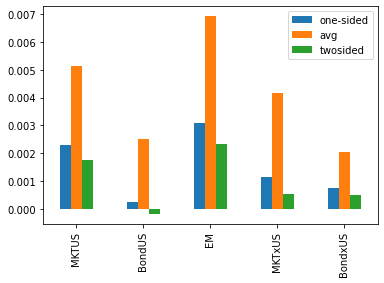

In [122]:
# Plot the lower bar of the two-sided confidence interval

ER0['twosided']=Re.mean()-1.96*(Re.std()/(Re.shape[0]**0.5))
ER0.plot.bar()
plt.show()

## Pvalues


* Instead of using our t-stats to do a test at a particular level of significance, say 95%

* We can use the normal cdf to find p-value, which gives us the highest level of significance our data is consistent with

* Here again, against the zero null hypothesis

In [123]:
# We can also construct p'values
from scipy.stats import norm
# and I am creating this `ps` object which is the standard normal distribution
ps=norm(0,1)

In [124]:
ps.isf(0.95)
ps.ppf(0.95)

1.6448536269514722

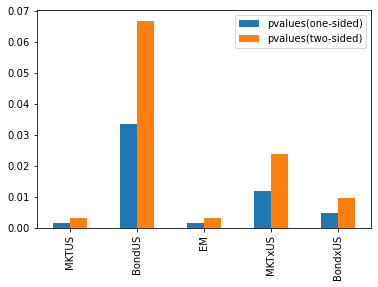

In [125]:
ER0['pvalues(one-sided)']=1-ps.cdf((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)
ER0['pvalues(two-sided)']=(1-ps.cdf(np.abs((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)))*2
ER0[['pvalues(one-sided)','pvalues(two-sided)']].plot.bar()
plt.show()

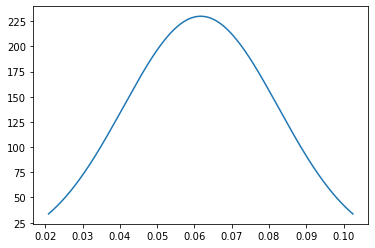

In [126]:
# lets look at a two-sided 95% confidence interval (I am annulaizing for convenience)

# (1) choose the confidence level
interval=0.95
# in the two-sided case, tail probability is half of (1-interval)
tails=(1-interval)/2

# (2) construct a normal distribution using the mean and standard deviation of a chosen asset
asset='MKTUS'
mu=Re[asset].mean()
mu_sigma=Re[asset].std()/Re[asset].count()**0.5
# do also at yearly, but do so with explanation

p=norm(mu,mu_sigma)

# (3) get the value of the left tail and the right tail
lefttail=p.ppf(tails)
righttail=p.ppf(1-tails)
# note that x=pnorm.isf(q) is the inverse of the CDF.
# The inverse CDF at `q` is also referred to as the `q quantile` of a distribution.
# For a continuous distribution `DIST`, the inverse CDF at q is the value x such that CDF[DIST,x]=q. 
# So there is exactly probability q that the realization is higher than x.

# or equivalently
#lefttail=mu+pnorm.isf(tails)*musigma
#righttail=mu+pnorm.isf(1-tails)*musigma

# (4) plot
grid=np.linspace(lefttail,righttail,1000)
# this constructs a grid going spanning the region given by the confidence interval

plt.plot(grid*12, p.pdf(grid))
plt.show()

## Test if all assets have the same average return

* A more relevant test is whether all these assets have the same average return

> Why that is the most relevant hypothesis for us as we do MV optimization?

* For assets that have a average return below the average, I compute the probability that this expected return is indeed below, and  for assets that have the avg return above avg I compute the probability that the expected return is indeed above the mean across assets

* I will simply use the absolute value to do that

In [127]:
Re.mean()

MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002054
dtype: float64

         one-sided       avg  twosided  pvalues(one-sided)  \
MKTUS     0.002295  0.005140  0.001739            0.001526   
BondUS    0.000264  0.002523 -0.000176            0.033475   
EM        0.003078  0.006923  0.002328            0.001573   
MKTxUS    0.001137  0.004149  0.000550            0.011928   
BondxUS   0.000754  0.002054  0.000500            0.004784   

         pvalues(two-sided)  same_avg_pvalue  
MKTUS              0.003052         0.571257  
BondUS             0.066950         0.235012  
EM                 0.003147         0.238187  
MKTxUS             0.023855         0.996144  
BondxUS            0.009567         0.007963  


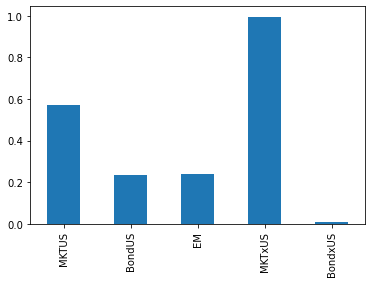

In [128]:

# ER0['same_avg_pvalue']=\
# (1-pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()>Re.mean().mean())\
# +(pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()<=Re.mean().mean())
#(probability of being above the average)*(average above avg across assets?)
#(probability of being below the average)*(average below avg across assets?)

# or much more easily:
# (1) save the standard deviation of the average excess return of each asset as `stdmean`
stdmean=Re.std()/(Re.shape[0]**0.5)
# (2) construct the t-stat for each asset
tstatmean=np.abs((Re.mean()-Re.mean().mean())/stdmean).values
# (3) calculate p-values for two-sided hypothesis testing
ER0['same_avg_pvalue']=(1-ps.cdf(tstatmean))*2

print(ER0)

# pvalue is the probability that the null hupothesis is right. So in this case it tells us that there is 
# a 60% probability that the mktus return equals to the average  and 100% probability that the MKTxUS expected return
# is equal to the average of all assets average returns

# here we can only clearly reject the hypothesis that non us bonds expected returns are equal to the average returns
ER0.same_avg_pvalue.plot.bar()
plt.show()

> Can you interepret this plot?

In [44]:
# import BEME (Book-equity over Market equity) sorted portfolios
# BEME 1 has low book to market- > Known as growth stocks (example: Tesla, Amazon, Facebook)

# BEME 10 has high book to market -> Known as value stocks ( old firms: utilities, banks, insurance companies)

# but it changes....

url = "https://www.dropbox.com/s/gds8ho9rt1imw03/Valueportfolios.csv?dl=1"
parser = lambda date: pd.to_datetime(date,format='%Y%m')
Data = pd.read_csv(url,index_col=0, 
                         parse_dates=True,date_parser=parser,skiprows=23,nrows=1092,na_values=-99.99)


# need to adjust the date to the end-of-month convention 
# (Even though both returns for a given month are end-of-month to end-of-month,
# when we import the value portfolios, Python used the first day of the month as date. 
# To fix that, we will convert it to end-of-month
# It is important to do that before the merge. Why? )
Data.index=Data.index+pd.tseries.offsets.MonthEnd()
(Data.head())
# ready to merge with Market and RF

Data=Data/100

In [45]:
# merge with factors
df=pd.merge(Data,Factors,left_index=True,right_index=True)
df.head()

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10,RF,MKT
1926-07-31,0.0463,0.0124,0.1140,0.0168,0.0150,0.0209,0.0273,0.0158,0.0063,0.0052,0.0022,0.0318
1926-08-31,0.0015,0.0218,0.0640,0.0238,0.0158,0.0263,0.0446,0.0494,0.0831,0.0392,0.0025,0.0289
1926-09-30,-0.0011,-0.0230,0.0632,0.0073,-0.0089,0.0038,-0.0028,0.0017,-0.0216,0.0044,0.0023,0.0059
1926-10-31,-0.0378,-0.0163,-0.0501,-0.0141,-0.0231,-0.0210,-0.0465,-0.0280,-0.0546,-0.0117,0.0032,-0.0292
1926-11-30,0.0603,0.0149,0.0111,0.0363,0.0197,0.0180,0.0400,0.0385,0.0277,0.0176,0.0031,0.0284


In [46]:
# transfor in excess returns
Re=df.copy()
Re.iloc[:,0:10]=Re.iloc[:,0:10].subtract(Re['RF'],axis=0)
Re.iloc[:,11]=Re.iloc[:,11].subtract(Re['RF'],axis=0)
# take the risk-free rate column out of the database
del Re['RF']
Re.head()

,BEME1,BEME2,BEME3,BEME4,BEME5,BEME6,BEME7,BEME8,BEME9,BEME10,MKT
1926-07-31,0.0441,0.0102,0.1118,0.0146,0.0128,0.0187,0.0251,0.0136,0.0041,0.0030,0.0296
1926-08-31,-0.0010,0.0193,0.0615,0.0213,0.0133,0.0238,0.0421,0.0469,0.0806,0.0367,0.0264
1926-09-30,-0.0034,-0.0253,0.0609,0.0050,-0.0112,0.0015,-0.0051,-0.0006,-0.0239,0.0021,0.0036
1926-10-31,-0.0410,-0.0195,-0.0533,-0.0173,-0.0263,-0.0242,-0.0497,-0.0312,-0.0578,-0.0149,-0.0324
1926-11-30,0.0572,0.0118,0.0080,0.0332,0.0166,0.0149,0.0369,0.0354,0.0246,0.0145,0.0253


Note below how average returns increase in Book to market

- Value (BEME10) stocks have higher average returns than growth stocks (BEME1)

<AxesSubplot:>

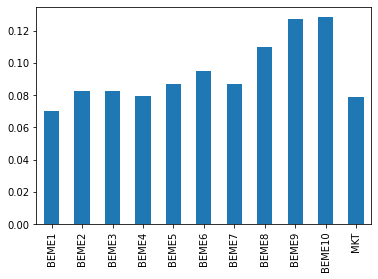

In [47]:
(Re.mean()*12).plot.bar()

### Lets do a time-series test of the CAPM using these 10 Book-to-market sorted portfolios 

- What does this tell us about the market?
- What does this tell us about BEME10?

In [50]:
# We have a monthly alpha of 0.0033
print(0.0033*12)
# yearly alpha is about 4%
x.mean()*12
# yearly market premium is about 6%

0.039599999999999996


const    12.000000
MKT       0.063508
dtype: float64

In [51]:
temp=Re['1963':'2018'] 
# On the right hand side, we have 'MKT' portfolio, we will add an constant term to it
x= sm.add_constant(temp['MKT'])
# the coefficient on the constant is the "alpha"

# On the left hand side, we have 'BEME10' portfolio
y= temp['BEME10']-temp['BEME1']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.159
Date:                Mon, 26 Apr 2021   Prob (F-statistic):             0.0760
Time:                        09:34:55   Log-Likelihood:                 1076.3
No. Observations:                 654   AIC:                            -2149.
Df Residuals:                     652   BIC:                            -2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.002      2.445      0.015       0.001       0.008
MKT            0.0740      0.042      1.777      0.076      -0.008       0.156
==============================================================================
Omnibus:                       52.948   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.480
Skew:                           0.438   Prob(JB):                     2.08e-28
Kurtosis:                       4.978   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lecture 12/4 ended here

In [52]:
E=pd.DataFrame(Re.mean())
E

,0
BEME1,0.005859
BEME2,0.006873
BEME3,0.006907
BEME4,0.006643
BEME5,0.007234
BEME6,0.007923
BEME7,0.007247
BEME8,0.009139
BEME9,0.010582
BEME10,0.010701


In [53]:
# now lets build a function that run the regression for all the portfolios and stores the info in a dataframe
def TSregression(temp):
    E=pd.DataFrame(temp.mean())
    E.columns=['AvgReturns']
    x= sm.add_constant(temp['MKT'])
    E['std']=temp.std()
    E['alpha']=E['AvgReturns']*0
    E['std_alpha']=E['AvgReturns']*0
    E['t-alpha']=E['AvgReturns']*0
    E['beta']=E['AvgReturns']*0
    E['std_beta']=E['AvgReturns']*0
    E['std_e']=E['AvgReturns']*0
    
    for portfolios in E.index[0:10]:
        y= temp[portfolios]
        results= sm.OLS(y,x).fit()
        E.at[portfolios,'alpha']=results.params[0]
        E.at[portfolios,'beta']=results.params[1]
        E.at[portfolios,'std_e']=results.resid.std()
        E.at[portfolios,'std_alpha']=results.HC0_se[0]
        E.at[portfolios,'std_beta']=results.HC0_se[1]
        E.at[portfolios,'pvalues']=results.pvalues[0]
    
    E['t-alpha']=E['alpha']/E['std_alpha']
    E.at['MKT','beta']=1 
    return E

In [54]:
# Lets select a sample to do our analysis

# this is a sample that I know that the value puzzle is strong
TSresults=TSregression(Re['1963':'2002'])
TSresults

,AvgReturns,std,alpha,std_alpha,t-alpha,beta,std_beta,std_e,pvalues
BEME1,0.003225,0.053380,-0.001581,0.000890,-1.776274,1.097840,0.024294,0.019468,0.077605
BEME2,0.004858,0.048438,0.000361,0.000623,0.578281,1.027575,0.017492,0.013486,0.560573
BEME3,0.004672,0.047969,0.000261,0.000680,0.383216,1.007874,0.018809,0.014794,0.701190
BEME4,0.004645,0.047198,0.000439,0.000845,0.519184,0.961090,0.027117,0.018285,0.601501
BEME5,0.004529,0.044331,0.000688,0.000900,0.764968,0.877361,0.025995,0.019683,0.446583
BEME6,0.006041,0.043503,0.002347,0.000968,2.424715,0.843970,0.029767,0.020797,0.014305
BEME7,0.006531,0.044530,0.002767,0.000992,2.790137,0.859885,0.033048,0.021618,0.005514
BEME8,0.007318,0.044255,0.003582,0.000981,3.650885,0.853580,0.030030,0.021566,0.000328
BEME9,0.007988,0.047929,0.003975,0.001091,3.644067,0.916861,0.035320,0.023961,0.000334
BEME10,0.009536,0.056103,0.005083,0.001461,3.479666,1.017468,0.047329,0.032025,0.000594


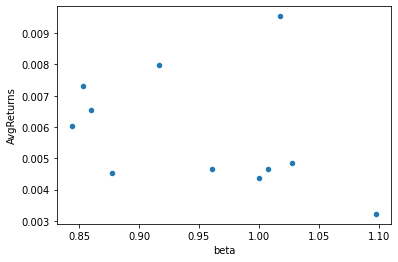

In [55]:
TSresults.plot.scatter(x='beta',y='AvgReturns')
plt.show()

> How should this plot look like if the Market was tangency as predicted by the CAPM?

> Is the market likely to be tangency?

* The value strategy is interesting not because value stocks have higher expected returns

* The Value strategy in interesting because these expected returns do not line up with market betas!

* And therefore, an investor that only holds the market can benefit by tilting his portfolio towards value stocks

* BOOK to MARKET sorted portfolios risk-return relation is not explained by the CAPM

  1. Value portfolios have very large alphas with respect to the market portfolio.
    - Portfolio 9 rejects the CAPM with a confidence of more than 99.99%
  2. A long-short strategy is likely to blow the CAPM out of the water even more strongly
    - Value and growth portfolios have similar betas but very different returns!
    - One can use the growth portfolio to hedge market exposure cheaply since it has high beta but low returns!

### The "Value" minus "growth" strategy

In [56]:
# I will select a sample where the results are particularly strong

# you should then investignate tto see how well it did recently

b='1963'
e='2002'

In [57]:
x= sm.add_constant(Re.loc[b:e,'MKT'])
y= Re.loc[b:e,'BEME10']-Re.loc[b:e,'BEME1']
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.066
Date:                Mon, 26 Apr 2021   Prob (F-statistic):             0.0806
Time:                        09:34:55   Log-Likelihood:                 803.34
No. Observations:                 480   AIC:                            -1603.
Df Residuals:                     478   BIC:                            -1594.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.002      3.195      0.001       0.003       0.011
MKT           -0.0804      0.046     -1.751      0.081      -0.171       0.010
==============================================================================
Omnibus:                       33.146   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.320
Skew:                           0.472   Prob(JB):                     9.71e-13
Kurtosis:                       4.370   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
y= Re.loc[b:e].BEME10-Re.loc[b:e].BEME1
print('average returns')
print([y.mean()*12,Re.loc[b:e].MKT.mean()*12])
print('Sharpe')
print([(y.mean()/y.std())*12**0.5,Re.loc[b:e].MKT.mean()/Re.loc[b:e].MKT.std()*12**0.5])
print('correlation')
print(np.corrcoef(y,Re.loc[b:e].MKT)[1,0])

average returns
[0.07574000000000003, 0.052525]
Sharpe
[0.47970405899166996, 0.33490847758654535]
correlation
-0.07983497016932051


# Interpretating  Factor models

## The academic view

- Factor models are models that describe how risk is priced in the economy

- When you test a model, i.e., run a time-series regression you are testing if that model describes the risk-return trade-off in the economy

- This a simultaneous test of (1) the proposed model and (2) whether markets are efficient

- What does market efficiency means?

- When you find an alpha that is statistically different from zero, you either
   
   1. reject the model
   2. reject that markets are efficient
   3. Or both
   
- **What you do with your portfolio really depends on what you believe**

- If (2)--markets are inneficient-- then it is pretty clear what you should do. You should load on this "anomaly" because you believe that model describe how risk should be priced. So this alpha is mispricing. It is NOT a 100 dollar bill on the floor, becasue harvesting alpha is risky, but the higher the Appraisal ratio the more it * *looks* * like a 100 dollars bill. (An Arbitrage opportunity is the limit where this Appraisal ratio grows to infinity)
    - In this (2) case you simply take into account the volatility and the comovement of the hedging portfolio with your portfolio

- If (1) and you reject the model. Now it is not so clear what you should do. Because you do have a view on what the proper model of risk and return is. So you don't know if this alpha is proper compensation for risks that you dot know. You might investigate and add this hedged portfolio as a factor if you think it captures some dimensions of risks that are important and not captured by your original model 
     - For example there is tons of wealth that is not traded in the stock market: housing, private business,your human capital, firms that have not being born yet
     - It can be capturing risks associated with the banking sector like financial crisis, which might not be fully reflected in the stock market
     - The factor can be caputring exposure to such risks and therefore it is a much more subtle question of whether you think your appetite for this risk is higher that the price of it (the appraisal ratio)

- **So after an rejection you need to do a post-morten to understand if you are in (1) or (2) and if you are in (1) what exactly is the kind of risk you are talkign about**



## The Practicioner view

- Factor models are used to describe invesestment strategies that are well known

- Much less thought (incorrectly, imo) is given why these strategies work

- For example: you add a value factor to your factor model (so a multi-factor model with  MKT and Value) not because you are taking a stand on the correct model, but simply to show that your strategy can add value even to someone that already has exposure to the market and the value factor. If your strategy has alpha, then you can claim that such investor can boost his Sharpe ratio by investing at least a bit in your strategy. The CAPM alpha by itself only answers this question for someone that has only an allocation to the market.

- So factors are used as a way to "summarize" some general risk-return feaures of the stock market (or any asset market), and by using these set of factors as "benchmarks" you can cleanly show your value added.

- The good practioner must have an understanding of where this alpha come from

   - What are the mistakes that people are making?
   - Why this persists?
   - How would I be able to tell if this trade got "crowded" and will disappear going forward?
   - Having a theory that is plausible and make sense is another way to guard agaisnt estiamtion uncertainty and data mining bias that we are always exposed to






## Investors

But of course an investor must in the end take a stand on (1) vs (2). If a practiciner comes pitching a large alpha, then must be convinced that this is not fair compensation for some risk that he/she is unaware

### Equilibrium thinking shoudl be used to to guard against estimation uncertainty (the in-sample vs out-sample problem)

* Not everyone can invest in the higher expected return assets
* If we were all to invest in the higher expected return assets, prices would go up and expected returns would go down
* Imposing equilibrium– that is:
  * Assume all investors in the world are choosing optimal portfolios, 
  * Then solve for the expected returns that make all the assets in the world be held
  * This is imposing equilibrium: since all assets must be held, and investors must want to hold them
  * Then expected returns have to adjust so everyone is happy and all assets are held
      
## Equilibrium in asset markets

* Fundamental Question: 
  >If everybody wants higher returns, why some assets earn higher average returns than others? Or why the tangency portfolio has larger positions in some assets than other assets?

* Finance theory: because these assets have low returns in bad times
  >What are bad times?
  
  >How much more extra expected return to experience low returns during bad times? 


### The general answer

* Investors' preferences, fears , and background risk exposures will aggregate to some notion of bad times

* Assets that pay poorly during these periods will earn higher returns per unit of volatility, i.e. will have high Sharpe ratios and be in the tangency portfolio with a large weight

* Assets that pay well during bad times, good hedges, will earn lower returns, possibly negative, and will be in the tangency portfolio with a negative weight

* CAPM is a particular case of this general framework where the market return summarizes how bad the times are


## The CAPM (again)

* The Wealth portfolio is the tangency portfolio

* The return on the wealth portfolio summarizes how Bad the times are

* Assets that co-vary more with the market must earn higher returns

* They pay poorly exactly when things are worse

* What is the wealth portfolio? It is the portfolio that holds all assets in proportion to their value

* We often use the equity market as a proxy for this, but that is not the CAPM

* In a way that CAPM is untestable because it is impossible to construct the true wealth portfolio


$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]$$



## Multi-factor models


  * APT: Arbitrage Price Theory
  * ICAPM: Intertemporal Capital Asset Pricing Model

* These models make less restrictive assumptions and predict that we will need additional factors beyond the market to "span" the tangency portfolio

* What does "span" mean?



$$E[R_t^i-R_t^f]=\beta_{i,mkt}E[R^{mkt}_t-R^f_t]+\sum_{j=1}^J\beta_{i,j}E[Factor_j]$$


- It is basically the same as before, but now we run a multivariate regression

  $$R_{i,t}=\alpha_i+\beta_{mkt}R^{mkt}_t+\beta_1 Factor_1+\beta_2 Factor_2+\beta_3 Factor_3+....+\beta_n Factor_n+\epsilon_{i,t}$$

- As long as the factors **are also excess returns**, the time-series alpha test is still valid and indentical as before.

- You can do single asset tests and simply use the alpha t-stat to test the model

- Everything that we discussed with the hedging/tracking portfolios apply here as well, but now

$$Hedged_{i,t}=R_{i,t}-(\beta_{mkt}R^{mkt}_t+\beta_1 Factor_1+\beta_2 Factor_2+\beta_3 Factor_3+....+\beta_n Factor_n)$$

where $(\beta_{mkt}R^{mkt}_t+\beta_1 Factor_1+\beta_2 Factor_2+\beta_3 Factor_3+....+\beta_n Factor_n)$ is the tracking portfolio

- You guys already learned Multi-factor theory (from Prof. Liu), but I will briefly discuss this next class as well.


## Time-series test for multi-factor models

In [76]:
url = "https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1"
Factors = pd.read_csv(url,index_col=0, 
                         parse_dates=True,na_values=-99)
Factors=Factors/100
# keep factors needed
Factors=Factors[['HML','SMB']]
Factors.head()

,HML,SMB
Date,,
1926-07-31,-0.0287,-0.0230
1926-08-31,0.0419,-0.0140
1926-09-30,0.0001,-0.0132
1926-10-31,0.0051,0.0004
1926-11-30,-0.0035,-0.0020


In [77]:
df=pd.merge(Re,Factors,left_index=True,right_index=True)
# no need to take out risk-free rate because these factors are already excess returns
df.mean()

BEME1     0.005859
BEME2     0.006873
BEME3     0.006907
BEME4     0.006643
BEME5     0.007234
BEME6     0.007923
BEME7     0.007247
BEME8     0.009139
BEME9     0.010582
BEME10    0.010701
MKT       0.006567
HML       0.003881
SMB       0.002101
dtype: float64

### Two-factor model

In [78]:
df.HML.mean()*12

0.04657472527472528

In [79]:
# initiate a data frame with row labels given by the 10 portfolios and the columns of the moments that we will estimate
df=df['1963':'2002']
names=df.drop(['MKT','HML','SMB'],axis=1).columns
FF2=pd.DataFrame([],index=names,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betahml','tbetahml']) 


# create empty dataframe to store residual
# FF2Resid=df.drop(['MKT','HML','SMB'],axis=1).copy()
# FF2Resid.loc[:,:]=np.nan

#store avg return
FF2['avg']=df.drop(['MKT','HML','SMB'],axis=1).mean()

for portfolio in FF2.index:
    y=df[portfolio]
    
    x=df[['MKT','HML']]
    x=sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF2.at[portfolio,['alpha','betamkt','betahml']]=results.params.values
    FF2.at[portfolio,['talpha','tbetamkt','tbetahml']]=(results.params/results.HC0_se).values
#     FF2Resid[portfolio]=results.resid
    
FF2=FF2.astype('float')  
FF2

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml
BEME1,0.003225,0.001393,2.109877,0.967143,52.119242,-0.507248,-14.597779
BEME2,0.004858,0.000885,1.388941,1.004520,60.156797,-0.089476,-2.423715
BEME3,0.004672,-0.000260,-0.378600,1.030771,52.346628,0.088867,2.122085
BEME4,0.004645,-0.000993,-1.187726,1.024028,46.748675,0.244269,5.454014
BEME5,0.004529,-0.001320,-1.538633,0.965618,46.760283,0.342533,7.335649
BEME6,0.006041,-0.000452,-0.591644,0.966994,49.114372,0.477469,11.638150
BEME7,0.006531,-0.000669,-0.939706,1.010890,45.301070,0.586068,16.803902
BEME8,0.007318,-0.000066,-0.100727,1.013915,57.730463,0.622277,16.044578
BEME9,0.007988,0.000035,0.045016,1.090035,53.741509,0.672105,18.675487
BEME10,0.009536,0.000369,0.332300,1.224648,37.043688,0.804089,13.605419


- How to think about the CAPM alpha versus the multi-factor alpha? 
- Is there a more correct one?
- Does adding a factor reduces "mispricing"?  what does that mean?


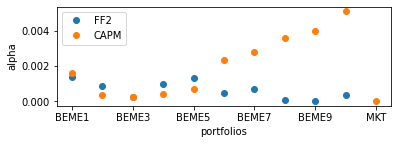

In [80]:
CAPM=TSresults.copy()
fig = plt.figure()
ax1 = plt.subplot(2,1,1)
FF2.alpha.abs().plot(ax=ax1,style='o')
CAPM.alpha.abs().plot(ax=ax1,style='o')

plt.legend(['FF2','CAPM'])
plt.ylabel('alpha') 
plt.xlabel('portfolios') 
plt.show()

______________________________________________

### Bonus Box:  A Three-factor model

In [81]:
# indentical code as before. Just add the new factor to the regression
FF3=pd.DataFrame([],index=df.drop(['MKT','HML','SMB'],axis=1).columns,\
                 columns=['avg','alpha','talpha','betamkt','tbetamkt','betahml','tbetahml','betasmb','tbetasmb']) 
# create dataframe to store residual
# FF3Resid=df.drop(['MKT','HML','SMB'],axis=1).copy()
#store avg return
FF3['avg']=df.drop(['MKT','HML','SMB'],axis=1).mean()

for portfolio in FF3.index:
    y=df[portfolio]
    x=df[['MKT','HML','SMB']]
    x=sm.add_constant(x)
    results = sm.OLS(y,x).fit()
    FF3.at[portfolio,['alpha','betamkt','betahml','betasmb']]=results.params.values
    FF3.at[portfolio,['talpha','tbetamkt','tbetahml','tbetasmb']]=(results.params/results.HC0_se).values
#     FF3Resid[portfolio]=results.resid
    
FF3=FF3.astype('float') 
FF3

,avg,alpha,talpha,betamkt,tbetamkt,betahml,tbetahml,betasmb,tbetasmb
BEME1,0.003225,0.001743,2.858402,0.986598,55.182834,-0.536490,-17.386493,-0.134760,-5.312898
BEME2,0.004858,0.000991,1.583049,1.010419,61.038715,-0.098341,-2.783742,-0.040855,-1.686404
BEME3,0.004672,-0.000190,-0.283986,1.034663,50.746516,0.083017,2.074329,-0.026960,-0.858285
BEME4,0.004645,-0.000924,-1.107970,1.027891,44.083883,0.238463,5.286738,-0.026757,-0.827511
BEME5,0.004529,-0.001088,-1.301458,0.978513,44.493451,0.323152,7.466797,-0.089319,-2.460703
BEME6,0.006041,-0.000400,-0.526854,0.969879,47.707327,0.473133,11.590126,-0.019985,-0.688658
BEME7,0.006531,-0.000670,-0.937915,1.010806,45.789553,0.586194,16.506778,0.000584,0.022704
BEME8,0.007318,-0.000537,-0.920447,0.987756,62.376607,0.661595,24.375635,0.181196,6.793609
BEME9,0.007988,-0.000443,-0.617529,1.063450,54.156043,0.712062,22.735360,0.184141,6.724677
BEME10,0.009536,-0.000783,-0.891318,1.160606,48.446541,0.900347,23.345170,0.443602,13.312943


___________________________________

# Additional discussion


##  Portfolio implications of the equilibrium view

* If you are like the average investor, you should simply hold the market portfolio

* You deviate from holding the market only if you are different from the average investor

* Examples with preferences:

  * If you are more risk-averse than the average investor you should hold some safe bonds as well
  * If you are more risk-tolerant you should borrow and invest more in the market than the average investor
  
* Example with "Background risk":(background risks are risks that investors are exposed to indepedently of their financial portfolio)

   * If you work in the automobile industry and your skill set is highly specialized to automobiles, you are more exposed to the automobile industry risk than the average investor.
   * Advice is to hold the market *after you hedge your automobile exposure*
   * in practice this could be investing in the market portoflio while avoiding auto-indistry stocks (and other stocks that are strongly correlated with it)
   
* This logic extends to multipl-factors as well, as we will see. 
   * So even if the CAPM does not work and you need addiitonal factors to explain differences in expected returns across assets, the equilbrium view still implies that if you are just like the average investors, you should simply hold the market portfolio.
   * So you will tilt your portfolio to a high expected return factor only if you are less exposed to it than the average investor
   * The intuition here is that this factor earns high returns relative to the CAPM because it earns fair compensation for risks that the average investors are exposed to

## Quantitative investing is going from "names"  to characteristics

The  sorting by date keeps the stocks inside the portfolios with similar characteristics

* This sorting will "work" if these chracteristics are good proxies for risks that the average investor cares about

  - will lead to spread in returns
  - will lead to a factor

* But it doesn't work always, if you use the first letter of stock ticker to construct 26 portfolios you are unlikely to get spread in average returns and most likely each portfolio will resemble the market portfolio but with much more volatility.

* And even if you do find something--> likely garbage, very hard to think about an economic model that would deliver that pattern!

Lets look at the portfolios' characteristics, i.e. Size, Book-to-Market, momentum,... of the different portfolios

* These are the characterisitcs that were used to create the portfolios. 

* Indeed, the key is that each portfolio has stocks of vastly different characterisitcs and keeps churning as firms change

  * Let's take MSFT (microsoft) as an example:

  * MSFT transitioned from being small in the 80's to be gigantic in the 90's, as a result, it moved up from the small portfolio to the big portfolio

  * Duing the Tech boom when MSFT had a huge valuation relative to it's book value, it went to the low BM portfolio

  * But then MSFT transtioned back to the high BM portfolio once it's market valuation collapsed in the aftermath of the techbubble

* The key is that firms' characteristics change over time, by constructing  portfolios, we hope to estimate some stable relationship between risk and return

* The fact that the market value is above or below the book value does not mean that the firm is mispriced. It is natural that the expectation of future earnings changed (which is not in book value), or investors' perception of risk changed.

* Even in a CAPM world you can see that happening: suppose the beta of a firm increases, then in equilibrium it's excess return must also increase! 

  - This would mean if it's market value goes down, Book-to-Market would go up at the same time, making expected returns going forward go up!

  - But in the data we see when BM changes (as firms swing across portfolios), the market beta does not, which is inconsitent with the CAPM

* Expected return alone is not a puzzle (for the CAPM). All puzzles are joint puzzles of expected return and beta — either high expected returns not matched with high betas, or high/low betas not matched with expected returns.

* The lower residual risk provides you a sharper exploration of the model mistakes

* There is always a way to make small-looking errors big (and profitable.)

## Why test with portfolios rather than just look at stocks?

1. Individual stocks have $\sigma$ = 40 − 80%, so $\sigma/\sqrt{T}$ makes it 
nearly impossible to accurately measure E(R). Portfolios have lower $\sigma$ by diversification.

2. Betas are badly measured too, and vary over time. 
        
   - Example: every firm starts small and risky, but eventually some of them become big and safe
        
3. You need an interesting alternative. Group stocks together that might have a violation,
this gives much more power.

4. This is what people do to (try to) make money. They don’t randomly buy stocks.
They buy stocks with certain characteristics that they think will outperform. Thus,
keep tests and practice close.

5. The CAPM seemed fine (and still does) until stocks were grouped by B/M. The
CAPM still works fine for some groupings (size), not others (value) .

But of course you need to know how to form portfolios based on which characteristcs to use.

And here the sky is the limit, as long you are careful about false discovery!

Examples:

- Stocks talked about in the media
- Stocks of CEOs tweeted by the President
- Stocks with recent deal annoucements
- Stocks with a lot of google search traffic (google trends)
- Stocks with a lot of Tweeter activity
- Stocks that are investing a lot
- Stocks that are very profitable
- Stocks that doing a lot of R&D
- Stocks invested by famous hedge fund managers
- Stocks invested by less famous managers
- Stokcs invested by Warren Buffet


## Economic vs statistical rejection

We see that the FF3 reduces pricing erros by a lot.

- Variation in the betas of the 3 factor model can explain much more of the variation in average returns across assets

Asset pricing tests are always about Sharpe ratios

- The FF3 model explains much more of the variation in average returns-- that is true-- but at the same time explains also a lot of the variation in realized returns

- This means that the unexplained risk is much smaller-- making Appraisal ratios not that different from the CAPM.

For a practioner: it is very different to have SR of 1 with an alpha of 5%, vs SR of 1 with alpha of 0.5%

- Why?

- Because you will have to use much more leverage to exploit mispricing from the FF3 model!

- The t-stats test treats these two things as equal, but they are only the same if you don't face any costs of leveraging up
